In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('INX_Future_Inc.xls')

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

## Categorical and Continuous data

- Drop EmpNumber 

### Continuous

- Age                             
- DistanceFromHome
- EmpHourlyRate
- NumCompaniesWorked
- EmpLastSalaryHikePercent
- TotalWorkExperienceInYears
- TrainingTimesLastYear
- ExperienceYearsAtThisCompany 
- ExperienceYearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

### Categorical

- Gender                          
- EducationBackground           
- MaritalStatus                   
- EmpDepartment                   
- EmpJobRole                     
- BusinessTravelFrequency   
- EmpEducationLevel
- EmpEnvironmentSatisfaction
- EmpJobInvolvement
- EmpJobLevel
- EmpJobSatisfaction
- OverTime
- EmpRelationshipSatisfaction
- EmpWorkLifeBalance
- Attrition

- PerformanceRating 

### Removing -  EmpNumber

In [5]:
data.drop('EmpNumber', axis=1, inplace = True)

## Label Encoding

### Gender 

- Male 1
- Female 0

In [6]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

### MaritalStatus

- Married 2
- Single 1
- Divorced 0

In [7]:
data['MaritalStatus'].value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

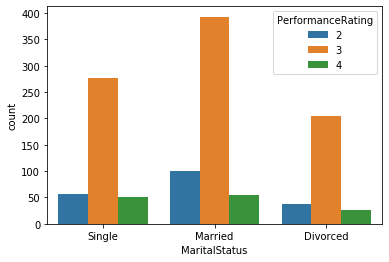

In [8]:
sns.countplot(data['MaritalStatus'], hue=data['PerformanceRating'])

In [9]:
def Marital_Status(x):
    if x == 'Divorced':
        return 0
    elif x == 'Single':
        return 1
    else:
        return 2

In [10]:
data['MaritalStatus'] = data['MaritalStatus'].apply(lambda x: Marital_Status(x))

### BusinessTravelFrequency
- Travel_Rarely        0
- Travel_Frequently    1
- Non-Travel           2

In [11]:
data['BusinessTravelFrequency'].value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

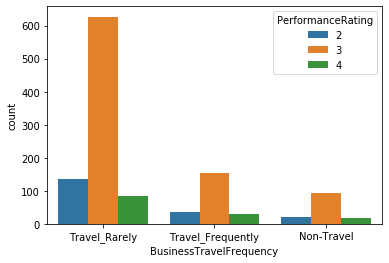

In [12]:
sns.countplot(data['BusinessTravelFrequency'], hue=data['PerformanceRating'])

In [13]:
def Business_Travel_Frequency(x):
    if x == 'Travel_Rarely':
        return 0
    elif x == 'Travel_Frequently':
        return 1
    else:
        return 2

In [14]:
data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].apply(lambda x: Business_Travel_Frequency(x))

In [15]:
data['BusinessTravelFrequency'].value_counts()

0    846
1    222
2    132
Name: BusinessTravelFrequency, dtype: int64

## EmpDepartment

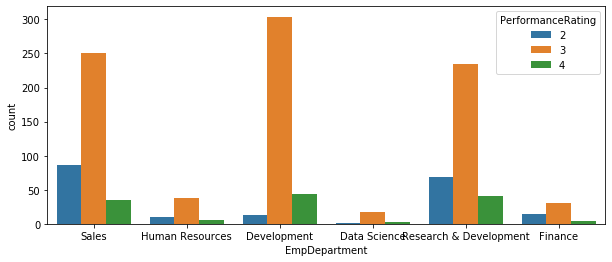

In [17]:
plt.figure(figsize = (10, 4))
sns.countplot(data['EmpDepartment'], hue=data['PerformanceRating'])

In [18]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,Marketing,1,Sales,Sales Executive,0,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,1,Marketing,1,Sales,Sales Executive,0,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,1,Life Sciences,2,Sales,Sales Executive,1,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,1,Human Resources,0,Human Resources,Manager,0,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,1,Marketing,1,Sales,Sales Executive,0,16,4,1,...,4,10,1,3,2,2,2,2,No,3


## One Hot Encoding

In [19]:
data = pd.get_dummies(data=data)

In [20]:
data.head()

,Age,Gender,MaritalStatus,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,1,1,0,10,3,4,55,3,2,...,1,0,0,0,0,0,1,0,1,0
1,47,1,1,0,14,4,4,42,3,2,...,1,0,0,0,0,0,1,0,1,0
2,40,1,2,1,5,4,4,48,2,3,...,1,0,0,0,0,0,0,1,1,0
3,41,1,0,0,10,4,2,73,2,5,...,0,0,0,0,0,0,1,0,1,0
4,60,1,1,0,16,4,1,84,3,2,...,1,0,0,0,0,0,1,0,1,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 57 columns):
Age                                     1200 non-null int64
Gender                                  1200 non-null int64
MaritalStatus                           1200 non-null int64
BusinessTravelFrequency                 1200 non-null int64
DistanceFromHome                        1200 non-null int64
EmpEducationLevel                       1200 non-null int64
EmpEnvironmentSatisfaction              1200 non-null int64
EmpHourlyRate                           1200 non-null int64
EmpJobInvolvement                       1200 non-null int64
EmpJobLevel                             1200 non-null int64
EmpJobSatisfaction                      1200 non-null int64
NumCompaniesWorked                      1200 non-null int64
EmpLastSalaryHikePercent                1200 non-null int64
EmpRelationshipSatisfaction             1200 non-null int64
TotalWorkExperienceInYears              1200 non-null

## Department wise performance

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [23]:
clf_models = [RandomForestClassifier(), GradientBoostingClassifier()]

In [24]:
def find_clf(clfs, x, y, k):
    means, stds = [], []
    for clf in clfs:
        try:
            acc = cross_val_score(clf, x, y, cv = k, n_jobs=-1)
            means.append(acc.mean())
            stds.append(acc.std())
            print(clf.__class__.__name__, ': mean = ', acc.mean(), ', std = ', acc.std())
        except:
            means.append(0)
            stds.append(0)
            print(clf.__class__.__name__, ': Not Applicable')
    return means, stds

In [110]:
depts = ['EmpDepartment_Data Science'
        ,'EmpDepartment_Development'
        ,'EmpDepartment_Finance'
        ,'EmpDepartment_Human Resources'
        ,'EmpDepartment_Research & Development'
        ,'EmpDepartment_Sales']

### Calculating the performance of each department

In [26]:
for i in range(len(depts)):
    print(depts[i])
    X = data[data[depts[i]] == 1].drop('PerformanceRating', axis=1).copy()
    y = data[data[depts[i]] == 1]['PerformanceRating'].copy()
    find_clf(clf_models, X, y, 5)

EmpDepartment_Data Science


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier : mean =  0.8266666666666665 , std =  0.14966629547095767


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GradientBoostingClassifier : mean =  0.8933333333333333 , std =  0.13727506854649335
EmpDepartment_Development
RandomForestClassifier : mean =  0.883608393128941 , std =  0.02251099442164875
GradientBoostingClassifier : mean =  0.9223135464231355 , std =  0.022864835479309505
EmpDepartment_Finance
RandomForestClassifier : mean =  0.6977777777777777 , std =  0.12300757780531599


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GradientBoostingClassifier : mean =  1.0 , std =  0.0
EmpDepartment_Human Resources
RandomForestClassifier : mean =  0.760909090909091 , std =  0.0713274372579383
GradientBoostingClassifier : mean =  0.7424242424242424 , std =  0.09988055308825536
EmpDepartment_Research & Development
RandomForestClassifier : mean =  0.847794712953319 , std =  0.056545741913449105
GradientBoostingClassifier : mean =  0.938778195249547 , std =  0.019396161554855955
EmpDepartment_Sales
RandomForestClassifier : mean =  0.8232972972972974 , std =  0.04366162471333084
GradientBoostingClassifier : mean =  0.8955571360834519 , std =  0.03275937351445782


## Comments

- From the performances of each departments, we observe that GradientBoostingClassifier gives good accuracy when compared to RandomForestClassifier 
- the departments (EmpDepartment_Development, EmpDepartment_Finance, EmpDepartment_Research & Development) have a good number in accuracy
- the department (EmpDepartment_Human Resources) has the least

### Calculating the performance

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X = data.drop('PerformanceRating', axis=1).copy()
X_scaled = StandardScaler().fit_transform(X)
y = data['PerformanceRating'].copy()
find_clf(clf_models, X_scaled, y, 5)

RandomForestClassifier : mean =  0.889112097121006 , std =  0.02816445902904602
GradientBoostingClassifier : mean =  0.932470419703151 , std =  0.026769697407021054


([0.889112097121006, 0.932470419703151],
 [0.02816445902904602, 0.026769697407021054])

## Top 3 Important Factors affecting employee performance

### Chi Square

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
X = data.drop('PerformanceRating', axis=1).copy()
y = data['PerformanceRating'].copy()

bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(3,'Score')) 

                           Specs       Score
12      EmpLastSalaryHikePercent  297.136917
19       YearsSinceLastPromotion  238.004284
17  ExperienceYearsAtThisCompany  133.602068


### Feature Importance - GradientBoostingClassifier

In [31]:
model = GradientBoostingClassifier()
model.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
print(model.feature_importances_)

[7.43013514e-03 8.65895523e-05 3.14492638e-04 1.26612221e-03
 1.00814623e-02 3.37097806e-03 2.72765929e-01 8.15580280e-03
 9.97872350e-04 1.50421430e-03 3.10453220e-03 3.74267687e-03
 2.48054706e-01 6.25646759e-04 5.97059044e-03 6.88703030e-03
 5.67360378e-02 3.00510601e-03 6.35035744e-02 1.94513147e-01
 1.06681638e-02 1.39441374e-03 0.00000000e+00 7.59602986e-04
 4.86150667e-04 8.54805650e-05 2.48539965e-04 9.13875365e-04
 6.79437273e-02 8.78245535e-06 7.15876589e-04 3.30336470e-04
 1.19262319e-04 3.01147940e-03 9.21331948e-04 0.00000000e+00
 1.31894661e-02 2.13597820e-04 1.45568908e-05 7.09454927e-05
 0.00000000e+00 7.67499196e-04 2.11476737e-04 0.00000000e+00
 1.46133743e-03 5.07431015e-04 6.67158379e-04 6.42314403e-04
 9.61624716e-05 0.00000000e+00 0.00000000e+00 8.39021163e-05
 1.54421475e-03 4.37745939e-04 2.18545822e-04 1.49975701e-04]


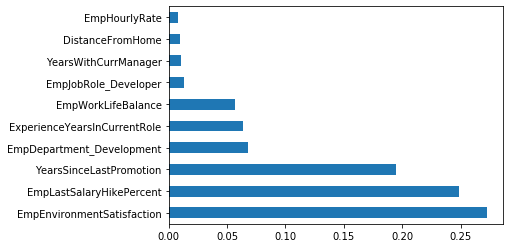

In [33]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Feature Importance  - RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


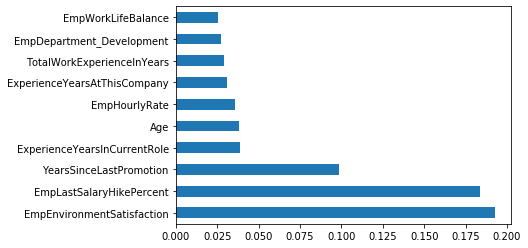

In [34]:
model = RandomForestClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Comment
- By performing Feature Importance technique, we can conclude that YearsSinceLastPromotion, EmpLastSalaryHikePercent and EmpEnvironmentSatisfaction are the top 3 features 

## Model with top 3 features

In [35]:
data.head()

,Age,Gender,MaritalStatus,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,1,1,0,10,3,4,55,3,2,...,1,0,0,0,0,0,1,0,1,0
1,47,1,1,0,14,4,4,42,3,2,...,1,0,0,0,0,0,1,0,1,0
2,40,1,2,1,5,4,4,48,2,3,...,1,0,0,0,0,0,0,1,1,0
3,41,1,0,0,10,4,2,73,2,5,...,0,0,0,0,0,0,1,0,1,0
4,60,1,1,0,16,4,1,84,3,2,...,1,0,0,0,0,0,1,0,1,0


In [36]:
data_features = data.loc[:,['YearsSinceLastPromotion', 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction','PerformanceRating']]

In [37]:
data_features.head()

,YearsSinceLastPromotion,EmpLastSalaryHikePercent,EmpEnvironmentSatisfaction,PerformanceRating
0,0,12,4,3
1,1,12,4,3
2,1,21,4,4
3,12,15,2,3
4,2,14,1,3


In [38]:
X = data_features.drop('PerformanceRating', axis=1).copy()
y = data_features['PerformanceRating'].copy()
find_clf(clf_models, X, y, 5)

RandomForestClassifier : mean =  0.8425003196299267 , std =  0.035327789882358324
GradientBoostingClassifier : mean =  0.8624550193521392 , std =  0.04848224789727772


([0.8425003196299267, 0.8624550193521392],
 [0.035327789882358324, 0.04848224789727772])

#### Standard Scaler

In [39]:
X = data_features.drop('PerformanceRating', axis=1).copy()
X_scaled = StandardScaler().fit_transform(X)
y = data_features['PerformanceRating'].copy()
find_clf(clf_models, X, y, 5)

RandomForestClassifier : mean =  0.844142607250369 , std =  0.03229152039740643
GradientBoostingClassifier : mean =  0.8624550193521392 , std =  0.04848224789727772


([0.844142607250369, 0.8624550193521392],
 [0.03229152039740643, 0.04848224789727772])

## Comment

- I have contructed a model with top 3 features, results are  RandomForestClassifier with 84%  and GradientBoostingClassifier with 86%

## Data Visualization

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 57 columns):
Age                                     1200 non-null int64
Gender                                  1200 non-null int64
MaritalStatus                           1200 non-null int64
BusinessTravelFrequency                 1200 non-null int64
DistanceFromHome                        1200 non-null int64
EmpEducationLevel                       1200 non-null int64
EmpEnvironmentSatisfaction              1200 non-null int64
EmpHourlyRate                           1200 non-null int64
EmpJobInvolvement                       1200 non-null int64
EmpJobLevel                             1200 non-null int64
EmpJobSatisfaction                      1200 non-null int64
NumCompaniesWorked                      1200 non-null int64
EmpLastSalaryHikePercent                1200 non-null int64
EmpRelationshipSatisfaction             1200 non-null int64
TotalWorkExperienceInYears              1200 non-null

### Age

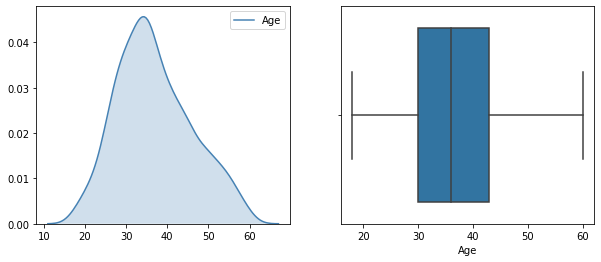

In [42]:
fig = plt.figure(figsize = (10, 4))
ax1 = fig.add_subplot(1,2, 1)
sns.kdeplot(data['Age'], ax=ax1, shade=True, color='steelblue')

ax1 = fig.add_subplot(1,2, 2)
sns.boxplot(data['Age'])

In [43]:
data['Age'].describe()

count    1200.000000
mean       36.918333
std         9.087289
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

## Comment 

- There are no outliers in Age column
- The avergae age is 37

## Gender

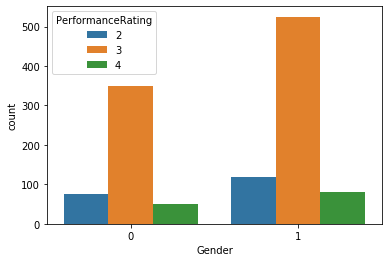

In [44]:
sns.countplot(data['Gender'], hue = data['PerformanceRating'])

### Comment

- There is no bais in gender column

### MaritalStatus

In [48]:
data['MaritalStatus'].value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

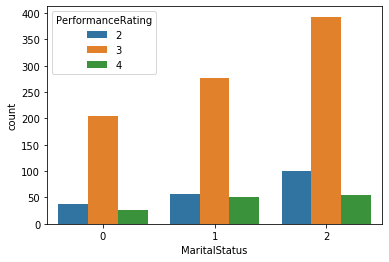

In [46]:
sns.countplot(data['MaritalStatus'], hue = data['PerformanceRating'])

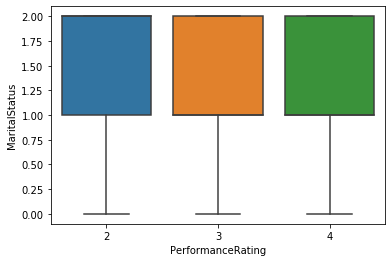

In [71]:
sns.boxplot(x = 'PerformanceRating', y = 'MaritalStatus', data = data)

## Comments

- No bais in the MaritalStatus column

## BusinessTravelFrequency

In [52]:
data['BusinessTravelFrequency'].value_counts()

0    846
1    222
2    132
Name: BusinessTravelFrequency, dtype: int64

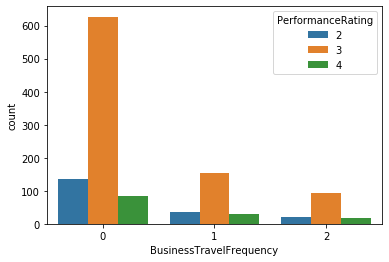

In [51]:
sns.countplot(data['BusinessTravelFrequency'], hue=data['PerformanceRating'])

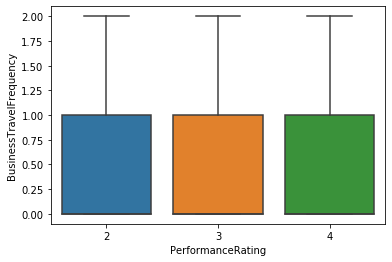

In [70]:
sns.boxplot(x = 'PerformanceRating', y = 'BusinessTravelFrequency', data = data)

## Comments

- No bais in the BusinessTravelFrequency column

## DistanceFromHome

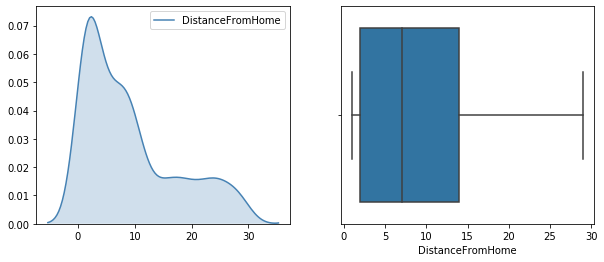

In [72]:
fig = plt.figure(figsize = (10, 4))
ax1 = fig.add_subplot(1,2, 1)
sns.kdeplot(data['DistanceFromHome'], ax=ax1, shade=True, color='steelblue')

ax1 = fig.add_subplot(1,2, 2)
sns.boxplot(data['DistanceFromHome'])


## EmpEducationLevel

In [59]:
data['EmpEducationLevel'].value_counts()

3    449
4    322
2    239
1    148
5     42
Name: EmpEducationLevel, dtype: int64

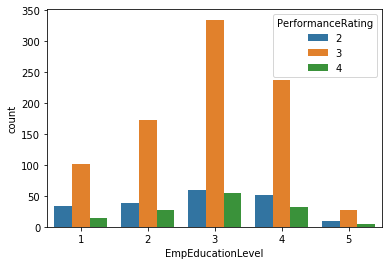

In [62]:
sns.countplot(data['EmpEducationLevel'], hue=data['PerformanceRating'])

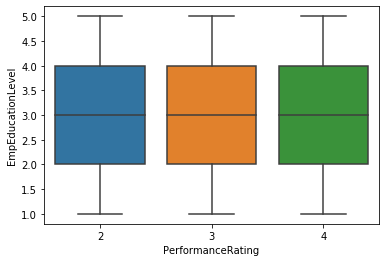

In [69]:
sns.boxplot(x = 'PerformanceRating', y = 'EmpEducationLevel', data = data)

## Comment

- No difference

## EmpEnvironmentSatisfaction

In [65]:
data['EmpEnvironmentSatisfaction'].value_counts()

3    367
4    361
2    242
1    230
Name: EmpEnvironmentSatisfaction, dtype: int64

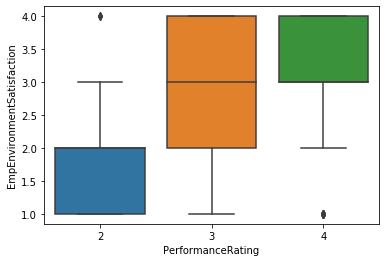

In [67]:
sns.boxplot(x = 'PerformanceRating', y = 'EmpEnvironmentSatisfaction', data = data)

## Comment
- Lower EmpEnvironmentSatisfaction has got performance 2, whereas higher employee environment satisfaction has got higher performance rating

## EmpHourlyRate

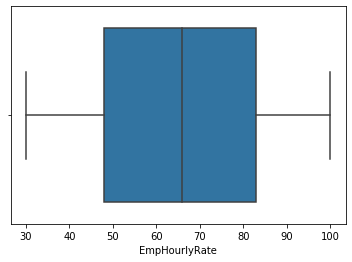

In [75]:
sns.boxplot(data['EmpHourlyRate'])

In [76]:
data['EmpHourlyRate'].describe()

count    1200.000000
mean       65.981667
std        20.211302
min        30.000000
25%        48.000000
50%        66.000000
75%        83.000000
max       100.000000
Name: EmpHourlyRate, dtype: float64

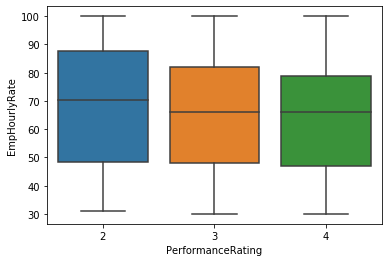

In [77]:
sns.boxplot(x = 'PerformanceRating', y = 'EmpHourlyRate', data = data)

## Comments
- Almost equal

In [78]:
## EmpJobInvolvement

In [79]:
data['EmpJobInvolvement'].value_counts()

3    724
2    294
4    112
1     70
Name: EmpJobInvolvement, dtype: int64

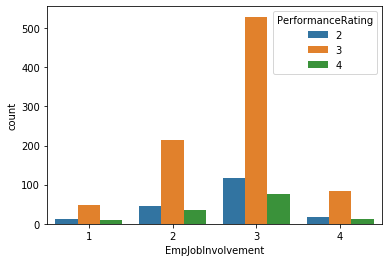

In [80]:
sns.countplot(data['EmpJobInvolvement'], hue=data['PerformanceRating'])

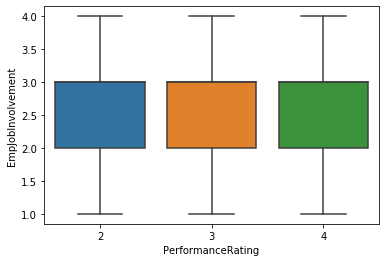

In [94]:
sns.boxplot(x = 'PerformanceRating', y = 'EmpJobInvolvement', data=data)

## comments

- No differencee

In [82]:
## EmpJobLevel

In [83]:
data['EmpJobLevel'].value_counts()

2    441
1    440
3    173
4     90
5     56
Name: EmpJobLevel, dtype: int64

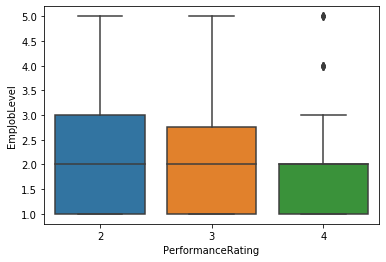

In [93]:
sns.boxplot(x='PerformanceRating', y='EmpJobLevel', data=data)

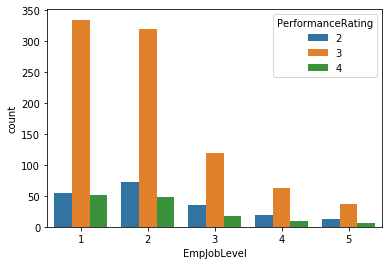

In [86]:
sns.countplot(data['EmpJobLevel'], hue=data['PerformanceRating'])

## Comments 
- No Difference

In [ ]:
## EmpJobSatisfaction

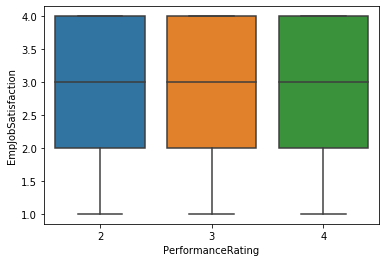

In [92]:
sns.boxplot(x='PerformanceRating', y='EmpJobSatisfaction', data=data)

In [88]:
data['EmpJobSatisfaction'].value_counts()

4    378
3    354
2    237
1    231
Name: EmpJobSatisfaction, dtype: int64

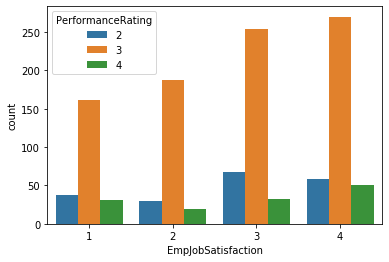

In [89]:
sns.countplot(data['EmpJobSatisfaction'], hue=data['PerformanceRating'])

## NumCompaniesWorked

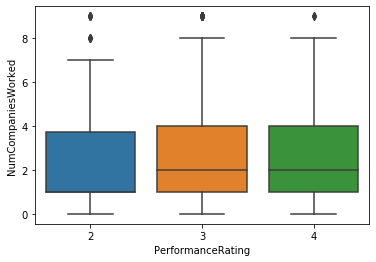

In [95]:
sns.boxplot(x='PerformanceRating', y='NumCompaniesWorked', data=data)

## Comments

- No much difference

## EmpRelationshipSatisfaction

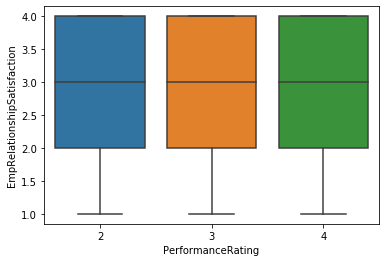

In [97]:
sns.boxplot(x='PerformanceRating', y='EmpRelationshipSatisfaction', data=data)

## Comments
- No difference

## TotalWorkExperienceInYears

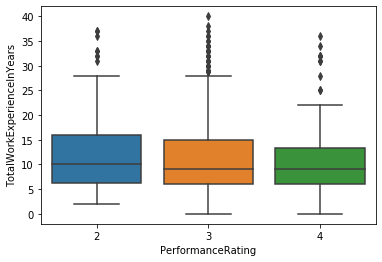

In [99]:
sns.boxplot('PerformanceRating','TotalWorkExperienceInYears',data=data)

## Comments
- No much difference

## TrainingTimesLastYear

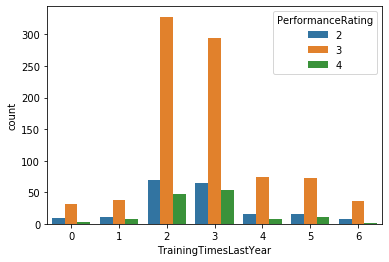

In [100]:
sns.countplot(data['TrainingTimesLastYear'], hue=data['PerformanceRating'])

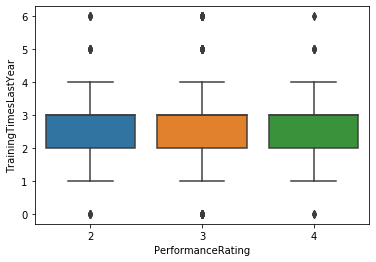

In [102]:
sns.boxplot('PerformanceRating','TrainingTimesLastYear', data=data)

## Comments
- No difference

### ExperienceYearsInCurrentRole

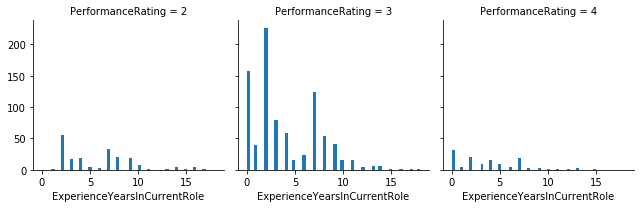

In [198]:
g = sns.FacetGrid(data, col="PerformanceRating")
g.map(plt.hist, "ExperienceYearsInCurrentRole",bins=50);

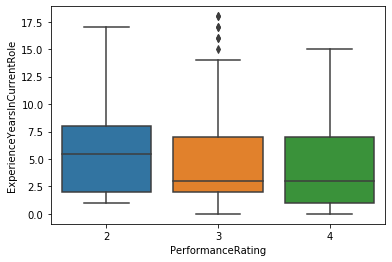

In [103]:
sns.boxplot('PerformanceRating', 'ExperienceYearsInCurrentRole', data=data)

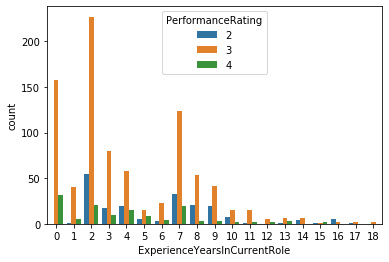

In [106]:
sns.countplot(data['ExperienceYearsInCurrentRole'], hue=data['PerformanceRating'])

## Comments
- Employees with less number of experience years in current role have performance Rating 3

### ExperienceYearsAtThisCompany

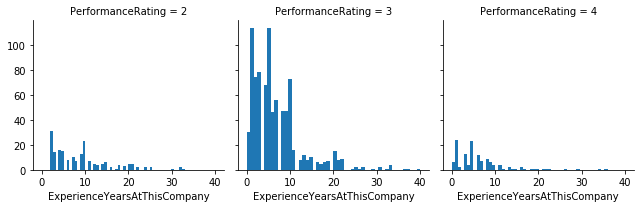

In [199]:
g = sns.FacetGrid(data, col="PerformanceRating")
g.map(plt.hist, "ExperienceYearsAtThisCompany",bins=50);

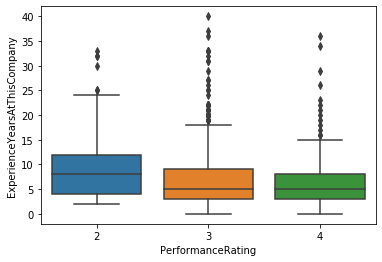

In [107]:
sns.boxplot('PerformanceRating',  'ExperienceYearsAtThisCompany', data=data)

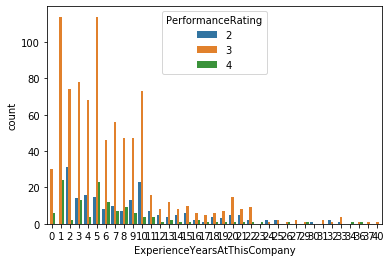

In [108]:
sns.countplot(data['ExperienceYearsAtThisCompany'], hue=data['PerformanceRating'])

## Comments
- Employees with less number of experience years have performance Rating 3 or 4

### EmpWorkLifeBalance

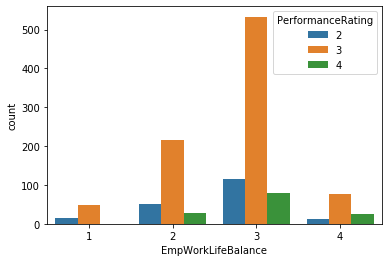

In [200]:
sns.countplot(data['EmpWorkLifeBalance'], hue=data['PerformanceRating']) 

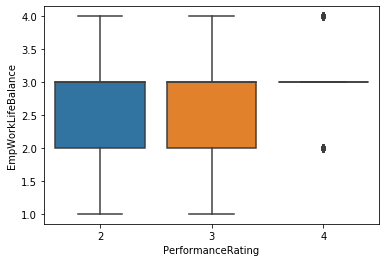

In [201]:
sns.boxplot(x = 'PerformanceRating', y = 'EmpWorkLifeBalance', data = data) 

In [109]:
data['EmpWorkLifeBalance'].value_counts()

3    727
2    294
4    115
1     64
Name: EmpWorkLifeBalance, dtype: int64

## Comments
- EmpWorkLifeBalance is more then higher performanceRating
- EmpWorkLifeBalance is less than lower performanceRating

### Emp Departments

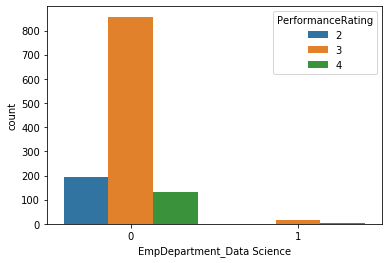

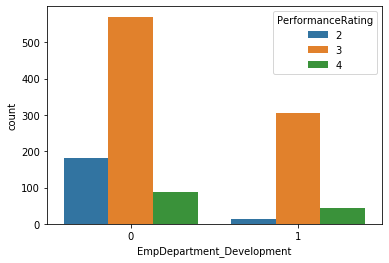

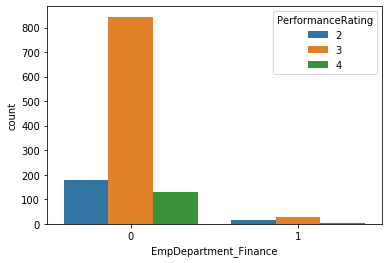

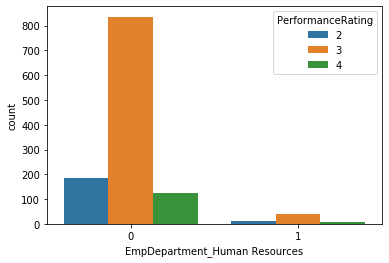

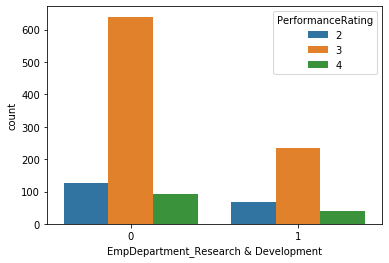

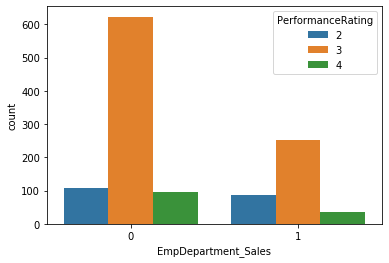

In [111]:
for i in range(len(depts)):
    fig, ax  = plt.subplots(1,1)
    sns.countplot(data[depts[i]], hue=data['PerformanceRating']) 

## comments

- Among all the departments - Development department has good performance rating when compared to others

### Adding few other features to the model

- Features are selected are based on data visualization
    - 'ExperienceYearsInCurrentRole', 'ExperienceYearsAtThisCompany','EmpWorkLifeBalance','EmpDepartment_Development'

In [204]:
data_improve = data.loc[:,['YearsSinceLastPromotion', 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction','ExperienceYearsInCurrentRole', 'ExperienceYearsAtThisCompany','EmpWorkLifeBalance','EmpDepartment_Development', 'PerformanceRating']]

In [205]:
data_improve.head()

,YearsSinceLastPromotion,EmpLastSalaryHikePercent,EmpEnvironmentSatisfaction,ExperienceYearsInCurrentRole,ExperienceYearsAtThisCompany,EmpWorkLifeBalance,EmpDepartment_Development,PerformanceRating
0,0,12,4,7,10,2,0,3
1,1,12,4,7,7,3,0,3
2,1,21,4,13,18,3,0,4
3,12,15,2,6,21,2,0,3
4,2,14,1,2,2,3,0,3


In [206]:
X = data_improve.drop('PerformanceRating', axis=1).copy()
y = data_improve['PerformanceRating'].copy()
find_clf(clf_models, X, y, 5)

RandomForestClassifier : mean =  0.9191578332577844 , std =  0.02917004379601553
GradientBoostingClassifier : mean =  0.9283245870962494 , std =  0.022591757375894098


([0.9191578332577844, 0.9283245870962494],
 [0.02917004379601553, 0.022591757375894098])

 ## Conclusion

- Departmemt wise performace
    - From the performances of each departments, we observe that GradientBoostingClassifier gives good accuracy when compared to RandomForestClassifier 
    - the departments (EmpDepartment_Development, EmpDepartment_Finance, EmpDepartment_Research & Development) have a good number in accuracy
    - the department (EmpDepartment_Human Resources) has the least
- Top 3 features are - 'YearsSinceLastPromotion', 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction'
- Performance of the model with top 3 features is 86% 
- Following are the Recommendations to improve the employee performance based on insights from analysis
    - 'ExperienceYearsInCurrentRole', 'ExperienceYearsAtThisCompany','EmpWorkLifeBalance','EmpDepartment_Development'
- Performance of the  model by added the above features is 92.8%
